# Michaelis-Menten kinetics dynamics

### The Michaelis-Menten kinetics is given by the following system of (coupled) ordinary differential equations (ODEs):

$$
\dot{x}^{(\nu)}_i = -x^{(\nu)}_i + \sum_j w_{i,j} \cdot \frac{x^{(\nu)}_j}{1 + x^{(\nu)}_j}, \quad i, j \in \{1, \dots, N\}
$$

# TODOs
- create many cohorts with uniform p such that every cohort has a different p but an identical "base model" weight matrix (p $\in$ [0.05, 0.1, 0.15, ..., 1])
- run "negative spearman correlation" (it's a measure, just like Euclidean distance) on the results
- Dimensionality reduction (PCA) - look for libraries that can perform dimensionality reduction. assert a "cloud like" distribution
- "Colonial expansion" - Make the defects uneven (e.g. base_model W $->$ 10 Ws with p = 0.2 and 40 Ws with p = 0.8)
- "Colonial expansion" should increase GCL (higher p $->$ higher GCL)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Import the odeint function from scipy for solving ODEs
from scipy.integrate import solve_ivp  # Import the solve_ivp function from scipy for solving ODEs
import random

In [86]:
# Set up the system of ODEs
def ode_system(x, t, W):  # t must be passed even if not used
    N = len(x)  # Get the number of elements in the state vector
    derivative_vector = np.zeros(N)  # Initialize the derivative vector (set zeros as default)
    for i in range(N):  # Loop over each element in the state vector
        # Compute the sum term for the i-th element according to the formula given in the paper
        sum_term = sum(W[i, j] * (x[j] / (1 + x[j])) for j in range(N) if j != i)  # list comprehension
        derivative_vector[i] = -x[i] + sum_term
    return derivative_vector

In [87]:
# Initialize parameters
N = 100  # Number of genes in a cell
avg_deg = 3
M = 50  # Number of "defects" of the matrix W
W = [np.zeros((N, N)) for _ in range(M)]  # Initialize the weight matrix with zeros; W[defect number, row, column]

initial_conditions = [np.random.rand(N) for _ in range(N)]

dist = lambda p: random.random() < p
q = 1  # Affects the range of the random numbers generated
p = 1 / M  # Probability to change the non-zero elements in w (defect the weight matrix)

num_of_time_stamps = 1000
t_final = 10
t = np.linspace(0, t_final, num_of_time_stamps)

# TODO: Figure out how to make the odeint function stop when the system reaches a steady state or after a certain time period

In [88]:
# Set the base weight matrix
for i in range(N):
    # TODO: this is weird since I defined avg_deg as the average degree but I use it as probability (actual average might be different)
    W[0][i] = [np.random.uniform(0, 2 * q) if (i != j and dist(avg_deg / (N - 1))) else 0 for j in range(N)]

# Create defects of the weight matrix
base_model = W[0]
for m in range(M):
    for i in range(N):
        for j in range(N):
            if base_model[i, j] != 0:
                # Change the value with probability p*(m + 1) (higher probability for higher m) 
                W[m][i, j] = np.random.uniform(0, 2 * q) if dist(p * (m + 1)) else base_model[i, j]
            else:
                W[m][i, j] = 0

In [89]:
# Initialize the results array
results = [np.zeros((num_of_time_stamps, N)) for _ in range(M)]

# Solve the ODEs for all M weight matrix and corresponding initial conditions
for m in range(M):
    results[m] = odeint(ode_system, initial_conditions[m], t, args=(W[m],))

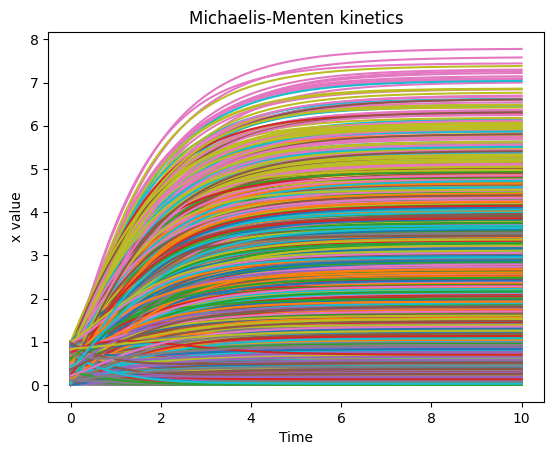

In [90]:
# Plot the results
for m in range(M):
    for n in range(N):
        plt.plot(t, results[m][:, n])
plt.xlabel('Time')
plt.ylabel('x value')
plt.title('Michaelis-Menten kinetics')
plt.show()

# ---------

In [91]:
# initial state
results[0][0, :]

array([0.99108996, 0.50154044, 0.25027061, 0.44460481, 0.83630151,
       0.76515121, 0.10470698, 0.53775734, 0.4629126 , 0.02449989,
       0.36404683, 0.64064896, 0.34919547, 0.33707565, 0.93263401,
       0.6964908 , 0.57236488, 0.29284949, 0.64870106, 0.77118013,
       0.78996057, 0.31014044, 0.34785423, 0.33274428, 0.79133258,
       0.8632042 , 0.2601542 , 0.60872645, 0.87827988, 0.43722596,
       0.47726488, 0.64229824, 0.0270669 , 0.73977926, 0.73651241,
       0.44671052, 0.11482295, 0.47194655, 0.7741788 , 0.24219892,
       0.46785625, 0.11135329, 0.05482015, 0.99453968, 0.7637334 ,
       0.94220777, 0.48963   , 0.64406807, 0.44781514, 0.44194173,
       0.43361473, 0.67868609, 0.38591315, 0.8048496 , 0.0242426 ,
       0.39596862, 0.1199428 , 0.45027459, 0.20118141, 0.26280618,
       0.92170933, 0.21640192, 0.94333455, 0.76059428, 0.86347381,
       0.59043451, 0.48170835, 0.03304476, 0.87383428, 0.12342926,
       0.75475447, 0.45851461, 0.6617266 , 0.51318838, 0.62925

In [92]:
final_state = [np.random.rand(N) for _ in range(N)]
# final state
for m in range(M):
    final_state[m] = results[m][-1, :]

In [93]:
# Calculate the variance of the final state
final_state_variance = np.var(final_state)
print(final_state_variance)

1.4185021388968566


In [94]:
# W2_variance = np.var(W_strong_influence)
# print(W_strong_influence)

In [95]:
# Save the final state vector to a csv file
# np.savetxt('final_state.csv', final_state, delimiter=',')